In [1]:
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt

import sys
for path in sys.path:
    print(path)
    
import MAS_library as MASL
import Pk_library as PKL
from powerbox import get_power

# import os
# os.chdir('/home/tnguser/examples/')

/home/tnguser/examples
/home/tnguser/examples
/afs/ipp/common/soft/idl/idl.8.8.3/idl/lib/bridges
/home/tnguser/illustris_python
/home/tnguser
/opt/conda/lib/python311.zip
/opt/conda/lib/python3.11
/opt/conda/lib/python3.11/lib-dynload

/home/tnguser/.local/lib/python3.11/site-packages
/opt/conda/lib/python3.11/site-packages
/home/tnguser/.local/lib/python3.11/site-packages/setuptools/_vendor


In [2]:
basePath = '../sims.TNG/TNG300-1/output/'

In [3]:
fields = ['SubhaloMass','SubhaloSFRinRad', 'SubhaloPos']
subhalos = il.groupcat.loadSubhalos(basePath, 99, fields=fields)

In [4]:
subhalos.keys()

dict_keys(['count', 'SubhaloMass', 'SubhaloSFRinRad', 'SubhaloPos'])

In [5]:
subhalos['SubhaloMass'].shape

(14485709,)

In [7]:
mass_msun = subhalos['SubhaloMass'] * 1e10 / 0.6774

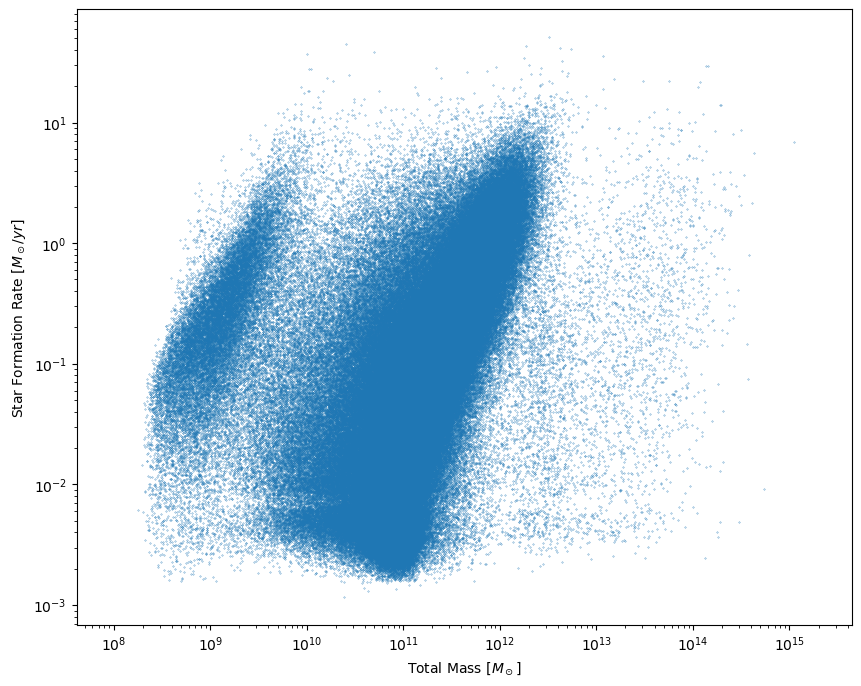

In [8]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot(mass_msun, subhalos['SubhaloSFRinRad'], '.', markersize=0.5)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Total Mass [$M_\odot$]')
ax.set_ylabel('Star Formation Rate [$M_\odot / yr$]');

In [9]:
np.shape(subhalos['SubhaloPos'])

(14485709, 3)

In [3]:
fields = ['GroupMass','GroupPos', 'GroupVel', 'GroupSFR']
halos = il.groupcat.loadHalos(basePath, 67, fields=fields)

In [4]:

h = 0.67
# density field parameters
grid    = 128    #the 3D field will have grid x grid x grid voxels
BoxSize = 302.6 #Mpc ; size of box
MAS     = 'CIC'  #mass-assigment scheme
verbose = True   #print information on progress
axis=0
threads=2

# particle positions in 3D
pos = halos['GroupPos']*1.e-3/h

# gas masses of the particles (masses goes from 0 to 1)
mass = halos['GroupMass']*1.e10/h

# define 3D density field
delta = np.zeros((grid,grid,grid), dtype=np.float32)

# construct 3D density field
MASL.MA(pos, delta, BoxSize, MAS, W=mass, verbose=verbose)

delta /= np.mean(delta, dtype=np.float64);  delta -= 1.0


Using CIC mass assignment scheme with weights
Time taken = 1.285 seconds



In [ ]:

Pk = PKL.Pk(delta, BoxSize, axis, MAS, threads, verbose)

In [ ]:

pk, k = get_power(delta, BoxSize)

In [ ]:
# 1D P(k)
k1D      = Pk.k3D
Pk1D     = Pk.Pk[:,0]
Nmodes1D = Pk.Nmodes1D

In [ ]:
plt.plot(k1D, Pk1D)
plt.plot(k, pk)
plt.xscale('log')
plt.yscale('log')
#plt.xlim(0.01,1.0)

In [ ]:
import Pk_library as PKL

In [ ]:
k1      = 0.5    #h/Mpc
k2      = 0.6    #h/Mpc

theta   = np.linspace(0, np.pi, 25) #array with the angles between k1 and k2

BBk = PKL.Bk(delta, BoxSize, k1, k2, theta, MAS, threads)
Bk  = BBk.B     #bispectrum
Qk  = BBk.Q     #reduced bispectrum
k   = BBk.k     #k-bins for power spectrum
Pk  = BBk.Pk    #power spectrum

In [ ]:
N=256
BoxSize = 302.6
LL = BoxSize/N

In [ ]:
kmin = 6.28/BoxSize
kmin

In [ ]:
kmax = 6.28/3*LL
kmax

In [ ]:
import numpy as np

In [ ]:
np.geomspace(kmin, 2,20)

In [ ]:
np.arccos(180*np.pi/180)

In [29]:
2*np.pi/3.

2.0943951023931953

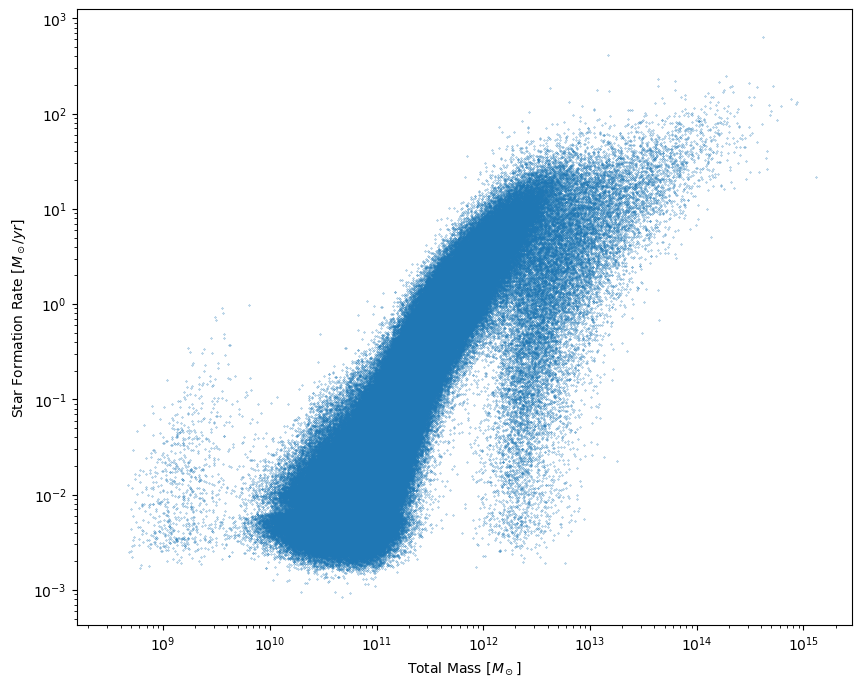

In [5]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot(mass, halos['GroupSFR'], '.', markersize=0.5)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Total Mass [$M_\odot$]')
ax.set_ylabel('Star Formation Rate [$M_\odot / yr$]');

/tmp/ipykernel_22/1772259816.py:3: RuntimeWarning: divide by zero encountered in log10
  ax.plot(mass, 6.98 + 0.99*np.log10(halos['GroupSFR']), '.', markersize=0.5)
Font 'default' does not have a glyph for '\r' [U+d], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\r' [U+d], substituting with a dummy symbol.


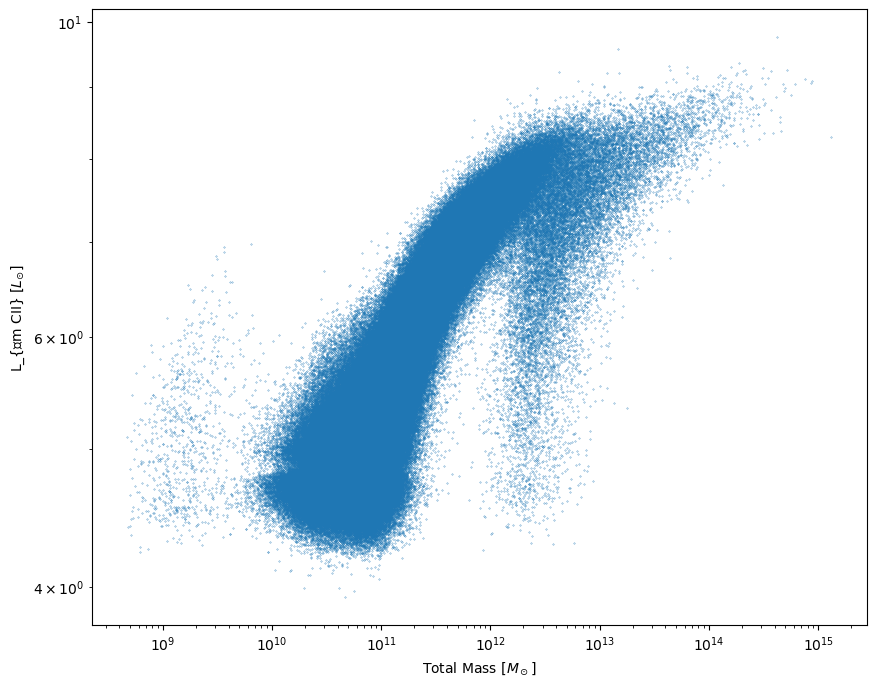

In [6]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.plot(mass, 6.98 + 0.99*np.log10(halos['GroupSFR']), '.', markersize=0.5)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Total Mass [$M_\odot$]')
ax.set_ylabel('L_{\rm CII} [$L_{\odot}$]');

In [25]:
data = np.load('Limpy/limpy/data/sfr_processed_TNG300-1.npz')

In [33]:
data.files

['halomass', 'sfr', 'z']

In [41]:
nn = len(data['z'])
nn
halo_mass = data['halomass']
zs = data['z']
sfr = data['sfr']

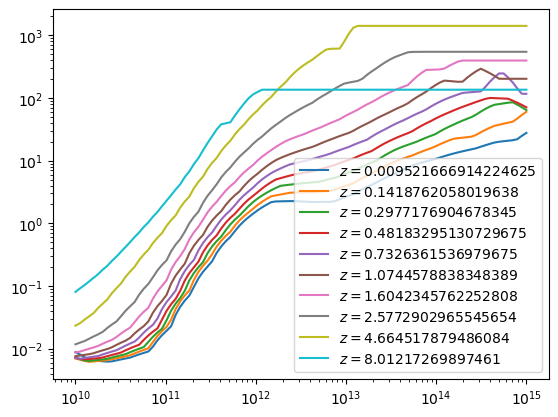

In [51]:
for i in range(0, nn, 10):
    plt.loglog(10**halo_mass, sfr[:,i], label=f'$z={zs[i]}$')
plt.legend()

In [49]:
np.shape(sfr)

(100, 99)

In [50]:
np.shape(zs)

(99,)

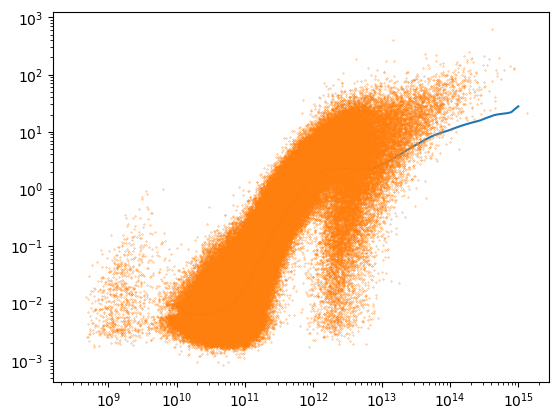

In [52]:
plt.loglog(10**halo_mass, sfr[:,0], label=f'$z={zs[0]}$')
plt.plot(mass, halos['GroupSFR'], '.', markersize=0.5)

In [58]:
from Limpy.limpy.lines import line_modeling

ModuleNotFoundError: No module named 'limpy'

In [57]:
!ls Limpy/limpy

cosmos.py  __init__.py	lines.py   plotsettings.py  powerspectra.py  utils.py
data	   inputs.py	params.py  plotter.py	    __pycache__


In [59]:
import os
os.chdir('/home/tnguser/examples/Limpy')

In [64]:
os.system('python setup.py install')

/home/tnguser/.local/lib/python3.11/site-packages/setuptools/_distutils/dist.py:261: UserWarning: Unknown distribution option: 'include_package_data'
  warnings.warn(msg)
/home/tnguser/.local/lib/python3.11/site-packages/setuptools/_distutils/dist.py:261: UserWarning: Unknown distribution option: 'zip_safe'
  warnings.warn(msg)
/home/tnguser/.local/lib/python3.11/site-packages/setuptools/_distutils/dist.py:261: UserWarning: Unknown distribution option: 'install_requires'
  warnings.warn(msg)
usage: setup.py [global_opts] cmd1 [cmd1_opts] [cmd2 [cmd2_opts] ...]
   or: setup.py --help [cmd1 cmd2 ...]
   or: setup.py --help-commands
   or: setup.py cmd --help

error: invalid command 'install'


256

In [62]:
!python -m pip install

ERROR: You must give at least one requirement to install (see "pip help install")


In [65]:
os.system('setup.py cmd --help')

sh: 1: setup.py: not found


32512